# This is the first example of Linear Regression: House Price Prediction

In [3]:
import os
import tarfile
import urllib.request
import pandas as pd

## Fetching data

In [4]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/mlbvn/handson-ml2-vn/main/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
HOUSING_PATH = os.path.join("datasets", "housing")
## Fetching data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
## Loading data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [13]:
fetch_housing_data() # Fetching house data
house = load_housing_data()
house.info()
# some value of total_bedrooms is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
# count element for every attributes
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Histogram of data
### Describe the frequency of value

In [39]:
# command Jupyter using its own backend for matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
# house["median_income"].hist(bins=50, figsize=(20,15))
# plt.show()
house["median_income"].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

## Split data into train_data and test_data

In [28]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # if every time the system re-run a
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indces = shuffled_indices[test_set_size:]
    return data.iloc[train_indces], data.iloc[test_indices]
## Phu thuoc vao ham random trong numpy, khi ma moi lan chay lai thi shuffled_indices se cho ra ket qua khac luc do ham split se chay qua het tat ca du lieu

In [36]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(house, test_size=0.2, random_state=42)
print(len(train_data))
print(len(test_data))

16512
4128


<Axes: >

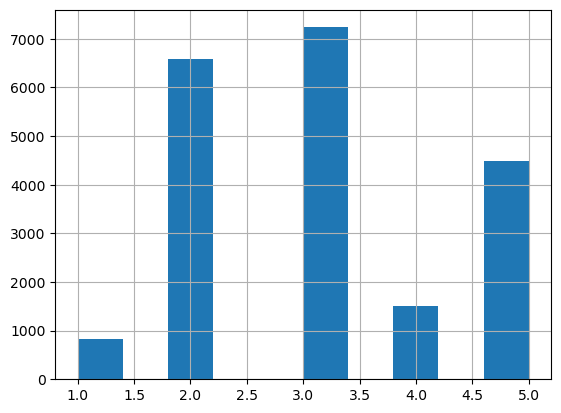

In [40]:
house["income_cat"] = pd.cut(house["median_income"], 
                             bins=[0, 1.5, 3.0, 4.5, 5., np.inf],
                             labels=[1, 2, 3, 4, 5])
house["income_cat"].hist()

### StratifiedShuffle

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(house, house["income_cat"]):
    strat_train_set = house.loc[train_index]
    strat_test_set = house.loc[test_index]
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
5    0.217539
4    0.073159
1    0.039971
Name: count, dtype: float64

In [43]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Data Exploration and Visualization

In [44]:
house = strat_train_set.copy()

# Trực quan hóa dữ liệu địa lý

<Axes: xlabel='longitude', ylabel='latitude'>

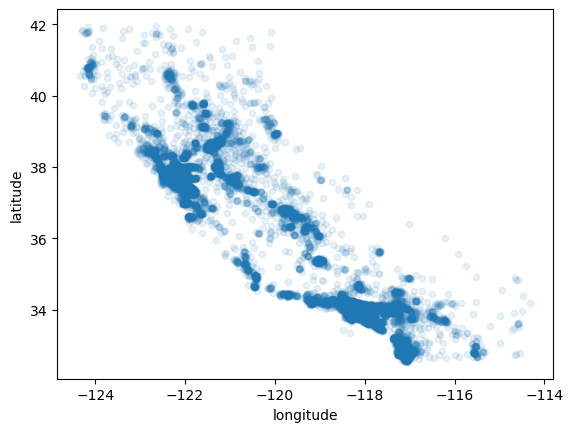

In [47]:
house.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)